In [2]:
import pandas as pd
import numpy as np

from exchange import *
from agents import *

import matplotlib.pyplot as plt
import random
from scipy.stats import bernoulli

# Exchange Visualization

In [3]:
e = Exchange()

e.add_bid(100, 5, "1", None)
e.add_bid(102, 2, "2", None)
e.add_bid(103, 3, "3", None)
e.add_bid(104, 4, "4", None)
e.add_bid(105, 10, "5", None)
e.add_ask(106, 8, "6", None)
e.add_ask(107, 3, "7", None)
e.add_ask(109, 12, "8", None)
e.add_ask(110, 6, "9", None)
e.add_ask(115, 4, "10", None)

In [4]:
def show_exchange(exchange):
    bidPrices = list(exchange.bids.keys())
    bidQtys = list(exchange.bids.values())
    askPrices = list(exchange.asks.keys())
    askQtys = list(exchange.asks.values())

    plt.figure(figsize=(3, 5))
    plt.barh(bidPrices, bidQtys, color="green", label=f"bid qty: {sum(bidQtys)}")
    plt.barh(askPrices, askQtys, color="red", label=f"ask qty: {sum(askQtys)}")
    plt.legend()
    plt.ylabel("price")
    plt.xlabel("qty")
    plt.title("Exchange Ladder")

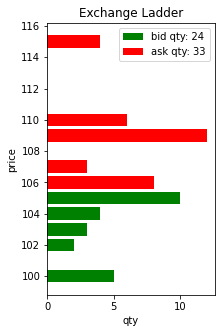

In [5]:
show_exchange(e)

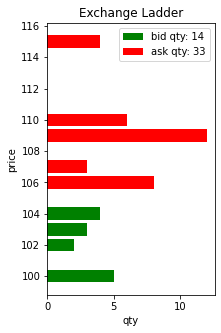

In [6]:
e.add_ask(105, 10, "11", None)
show_exchange(e)

In [7]:
min(e.asks.keys())

106

# Simulation Elements

In [8]:
'''
# TODO: agent cancel duration
# TODO: true price movement changing (variance over time)
'''

'\n# TODO: agent cancel duration\n# TODO: true price movement changing (variance over time)\n'

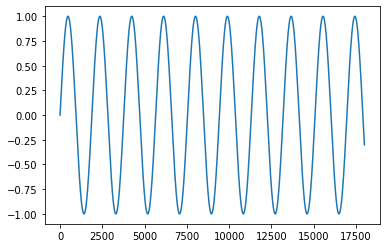

In [9]:
x = np.arange(0, 5 * 60 * 60)
T = 60 * 5 # period
y = np.sin(x / T)
plt.plot(x, y)

In [10]:
t = 40
true_price = np.sin(t / T)
true_price

0.13293862262231407

In [11]:
def execute_policy(e: Exchange):
    # main character params: true_value, quantity, side, spread, cid

    # simple wide policy
    a = MainCharacter(true_value=100, quantity=10, side="AB", spread=3, cid=-1)

    if a.cid not in list(e.ask_customers.keys()) and a.cid not in list(e.bid_customers.keys()):
        e.add_order(a)

In [12]:
execute_policy(e)

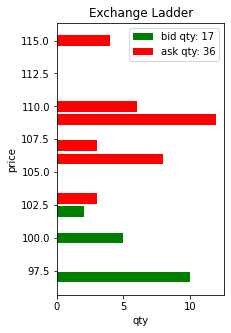

In [13]:
show_exchange(e)

In [27]:
# pre-determine some true price curve as a function of time
# can begin as uniform
e = Exchange()

### defining hyperparameters ###
agent_arrival_rate = 0.1
taker_probability = 0.4

price_function = lambda t: 100
# future price functions can incorporate like lagged information when the agents read it 
# true_price_func = lambda t: np.sin(t / 5*60)
customer_id = 1
count = 0

while e.get_timestamp() < 1000:     
    # agents arrive at same rate, some probability they are maker vs taker
    agent_arrival_time = random.expovariate(agent_arrival_rate)
    execute_policy(e)

    e.increment_timestamp(agent_arrival_time)
    e.check_cancelled_orders()

    order_duration_sd = 0.0 # placeholder
    theo_sd = 2.5
    agent_is_taker = random.random() < taker_probability
    if not agent_is_taker:
        mvn_skews = [8, 0]
        mvn_means = [2, 10]
        mvn_cov = [[9, -5.625], [-5.625, 6.25]]

        a = Maker((mvn_skews, mvn_means, mvn_cov), order_duration_sd, theo_sd, price_function(e.get_timestamp()), customer_id)
    
    else: 
        mvn_skews = [8, 0]
        mvn_means = [2, 20]
        mvn_cov = [[9, -9], [-9, 16]]
        
        a = Taker((mvn_skews, mvn_means, mvn_cov), order_duration_sd, theo_sd, price_function(e.get_timestamp()), customer_id)

    e.add_order(a)

    # print(e.get_timestamp())
    customer_id += 1
print("total simulation time:", e.get_timestamp())
print("total agents:", customer_id)

total simulation time: 1021.6656471194475
total agents: 94


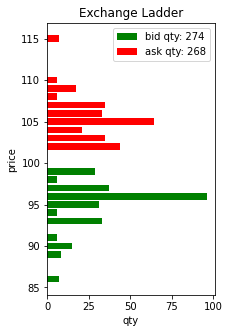

In [28]:
show_exchange(e)

In [29]:
e.ask_customers

{50: (102, 536.5562975767838, 5, <agents.Maker at 0x2679387b7c0>),
 58: (102, 602.2104387520883, 10, <agents.Maker at 0x26798f1ddc0>),
 63: (102, 663.0238456742188, 9, <agents.Maker at 0x26798f1deb0>),
 74: (102, 853.8989881621795, 20, <agents.Taker at 0x26798b08580>),
 51: (103, 546.8110934000297, 10, <agents.Maker at 0x26798b07370>),
 73: (103, 848.6810871275187, 7, <agents.Maker at 0x26798b085e0>),
 75: (103, 872.2258201695112, 8, <agents.Maker at 0x26798b084f0>),
 89: (103, 969.7925076261649, 10, <agents.Maker at 0x26798f1de20>),
 55: (104, 583.4567016069791, 15, <agents.Taker at 0x26798adaa00>),
 91: (104, 985.4794289868123, 6, <agents.Maker at 0x26798b088e0>),
 53: (105, 576.5538289219985, 6, <agents.Maker at 0x26798f1ddf0>),
 66: (105, 717.0680791480524, 8, <agents.Maker at 0x26798a3f130>),
 67: (105, 720.2186660510374, 8, <agents.Maker at 0x26798a3f100>),
 71: (105, 826.3489000220884, 18, <agents.Taker at 0x26798b08370>),
 79: (105, 885.2019548398462, 9, <agents.Maker at 0x2679

In [30]:
e.bid_customers

{66: (99, 717.0680791480524, 2, <agents.Maker at 0x26798a3f130>),
 69: (99, 791.3476297870958, 9, <agents.Maker at 0x26798a3f040>),
 77: (99, 876.7253760741926, 18, <agents.Taker at 0x26798b082b0>),
 87: (98, 947.2078726655191, 6, <agents.Maker at 0x26798b08610>),
 79: (97, 885.2019548398462, 9, <agents.Maker at 0x26798b08d30>),
 82: (97, 930.2380705358072, 9, <agents.Maker at 0x26798b085b0>),
 89: (97, 969.7925076261649, 10, <agents.Maker at 0x26798f1de20>),
 90: (97, 982.3009256790299, 9, <agents.Maker at 0x26798b08340>),
 50: (96, 536.5562975767838, 10, <agents.Maker at 0x2679387b7c0>),
 52: (96, 575.486119424442, 15, <agents.Taker at 0x26798f1dfd0>),
 58: (96, 602.2104387520883, 10, <agents.Maker at 0x26798f1ddc0>),
 61: (96, 640.1058546664777, 10, <agents.Maker at 0x26798f1df10>),
 62: (96, 657.2405161874308, 20, <agents.Taker at 0x26798a3f160>),
 68: (96, 774.8859637569011, 6, <agents.Maker at 0x26798a3f0d0>),
 80: (96, 890.9899427456771, 9, <agents.Maker at 0x26798b08550>),
 83:

In [40]:
# function to parse transactions from exchange
def summarize_transactions(ex: Exchange, price_function, num_agents=10):
    arr = ex.get_transactions()
    # arr

    df = pd.DataFrame(arr)
    long = df[["bid_customerid", "price", "quantity", "timestamp", "aggressor_side"]]
    long["customer_side"] = ["bid"] * len(long)
    long = long.rename(columns={"bid_customerid": "customer_id"})
    short = df[["ask_customerid", "price", "quantity", "timestamp", "aggressor_side"]]
    short["customer_side"] = ["ask"] * len(long)
    short = short.rename(columns={"ask_customerid": "customer_id"})
    short.loc[:, "quantity"] = -1 * short["quantity"]

    summary = pd.concat([long, short], axis=0).sort_values("timestamp")
    summary["transaction_value"] = -1 * summary["price"] * summary["quantity"]

    summary["mod_customer_id"] = summary["customer_id"] % num_agents
    profit = summary.groupby("mod_customer_id").sum()[["transaction_value", "quantity"]]
    profit["profit"] = profit["quantity"] * price_function(ex.get_timestamp()) + profit["transaction_value"]
    profit = profit.sort_values("profit", ascending=False)
    return summary, profit

In [41]:
summary, profit = summarize_transactions(e, price_function)
# s = summary.groupby("customer_id").sum("true_profit").sort_values("true_profit", ascending=False)
# s.head()

C:\Users\Albert Wen\AppData\Local\Temp\ipykernel_4956\961256193.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
C:\Users\Albert Wen\AppData\Local\Temp\ipykernel_4956\961256193.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


In [42]:
profit

,transaction_value,quantity,profit
mod_customer_id,,,
9,5143,-50,143
3,-906,10,94
4,3046,-30,46
6,-1566,16,34
5,-1475,15,25
1,987,-10,-13
0,-3086,30,-86
2,-2206,21,-106
8,63,-2,-137


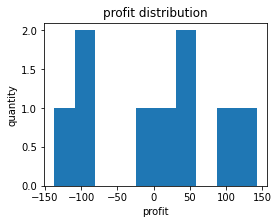

In [43]:
plt.figure(figsize=(4, 3))
plt.hist(profit["profit"])
plt.title("profit distribution")
plt.xlabel("profit")
plt.ylabel("quantity")
plt.show()
# assuming no price change and instant liquidation

In [44]:
profit.iloc[0]

transaction_value    5143
quantity              -50
profit                143
Name: 9, dtype: int64

In [47]:
summary[summary["mod_customer_id"] == profit.index[0]]

,customer_id,price,quantity,timestamp,aggressor_side,customer_side,transaction_value,mod_customer_id
6,9,104,-10,172.725473,bid,ask,1040,9
8,19,105,-14,193.951689,bid,ask,1470,9
7,9,105,-5,193.951689,bid,ask,525,9
9,19,100,-4,208.148578,bid,ask,400,9
14,29,100,-17,293.878287,bid,ask,1700,9
17,49,103,8,524.917871,bid,bid,-824,9
31,39,104,-8,894.824497,bid,ask,832,9


In [48]:
summary[summary["mod_customer_id"] == profit.index[-1]]

,customer_id,price,quantity,timestamp,aggressor_side,customer_side,transaction_value,mod_customer_id
2,8,100,-3,129.819505,bid,ask,300,8
5,8,101,-6,146.889207,bid,ask,606,8
12,28,97,-14,279.286618,ask,ask,1358,8
13,28,97,-4,279.286618,ask,ask,388,8
29,78,102,12,884.220966,bid,bid,-1224,8
35,88,105,2,965.233651,bid,bid,-210,8
34,88,105,11,965.233651,bid,bid,-1155,8
